# Data Explore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('P00000001-ALL.csv')
data.head()

/var/folders/hk/p7fcnhm10z92trzs_9kwqlyr0000gn/T/ipykernel_24862/2989573427.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('P00000001-ALL.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
category_counts = data.nunique()
print(category_counts)

cmte_id                  14
cand_id                  13
cand_nm                  13
contbr_nm            364681
contbr_city           14679
contbr_st                74
contbr_zip           308708
contbr_employer      135650
contbr_occupation     45073
contb_receipt_amt      8079
contb_receipt_dt        466
receipt_desc             58
memo_cd                   1
memo_text               757
form_tp                   3
file_num                 80
dtype: int64


In [4]:
# Voter Information for the Top Three Candidates
# Candidate vote ranking: done
# Candidate donation ranking: done
# Voter count ranking by state for the top 3 candidates: done
# Donation amount ranking by state for the top 3 candidates: done
# Average donation amount ranking by state for the top 3 candidates: done
# Vote percentage per state for the top 3 candidates: done

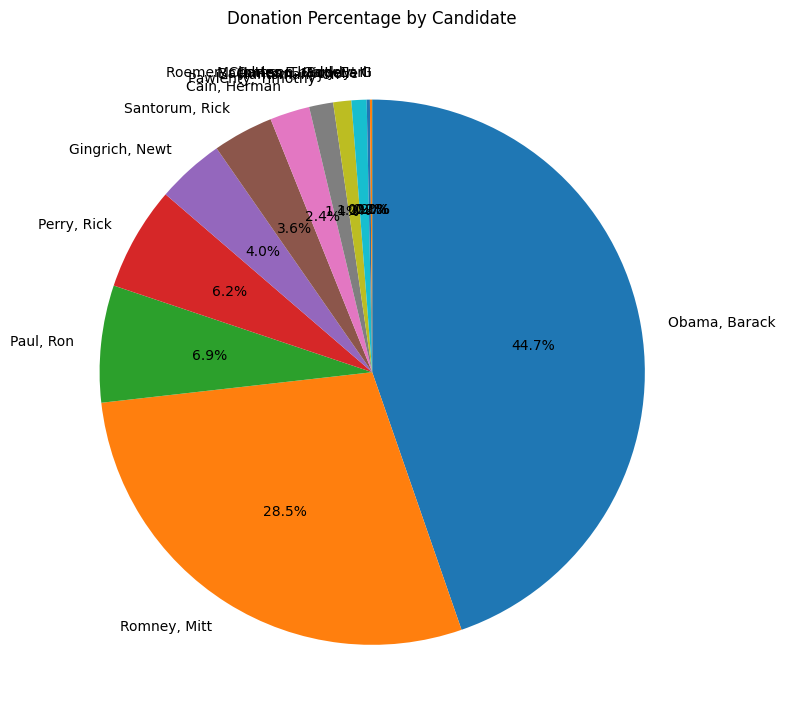

In [21]:
#| label: fig
# donation by candidate
donations_by_candidate = data.groupby('cand_nm')['contb_receipt_amt'].sum()

# decending order
donations_by_candidate_sorted = donations_by_candidate.sort_values(ascending=False)

# pie chart
plt.figure(figsize=(8,8))
plt.pie(donations_by_candidate_sorted, labels=donations_by_candidate_sorted.index, 
        autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Donation Percentage by Candidate')
plt.tight_layout()

# show
plt.show()

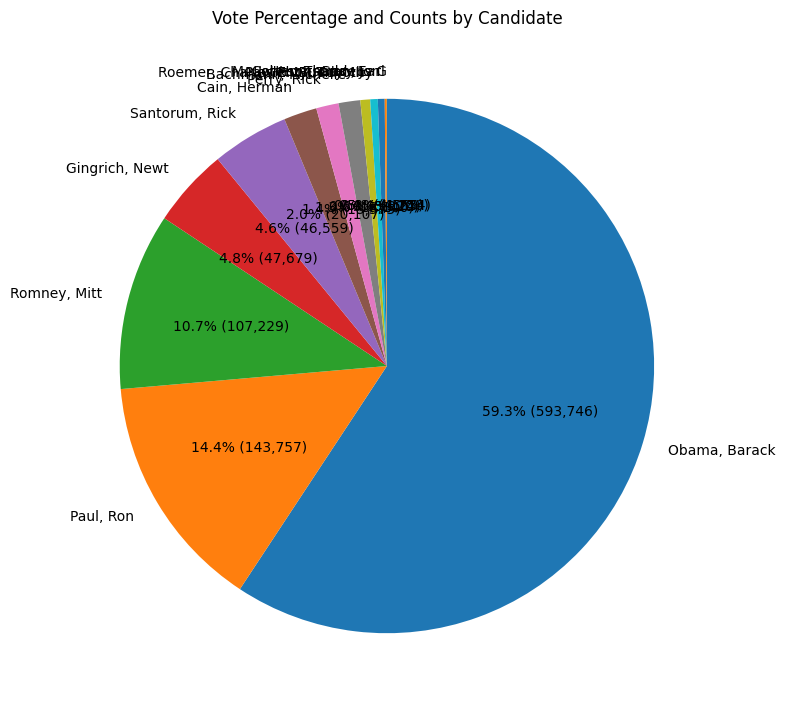

In [6]:
# donors by candidate
votes_by_candidate = data.groupby('cand_nm')['contb_receipt_amt'].count()

# decending order
votes_by_candidate_sorted = votes_by_candidate.sort_values(ascending=False)

# pie chart
plt.figure(figsize=(8,8))
plt.pie(votes_by_candidate_sorted, labels=votes_by_candidate_sorted.index, 
        autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(votes_by_candidate_sorted) / 100), 
        startangle=90, counterclock=False)
plt.title('Vote Percentage and Counts by Candidate')
plt.tight_layout()

# show
plt.show()


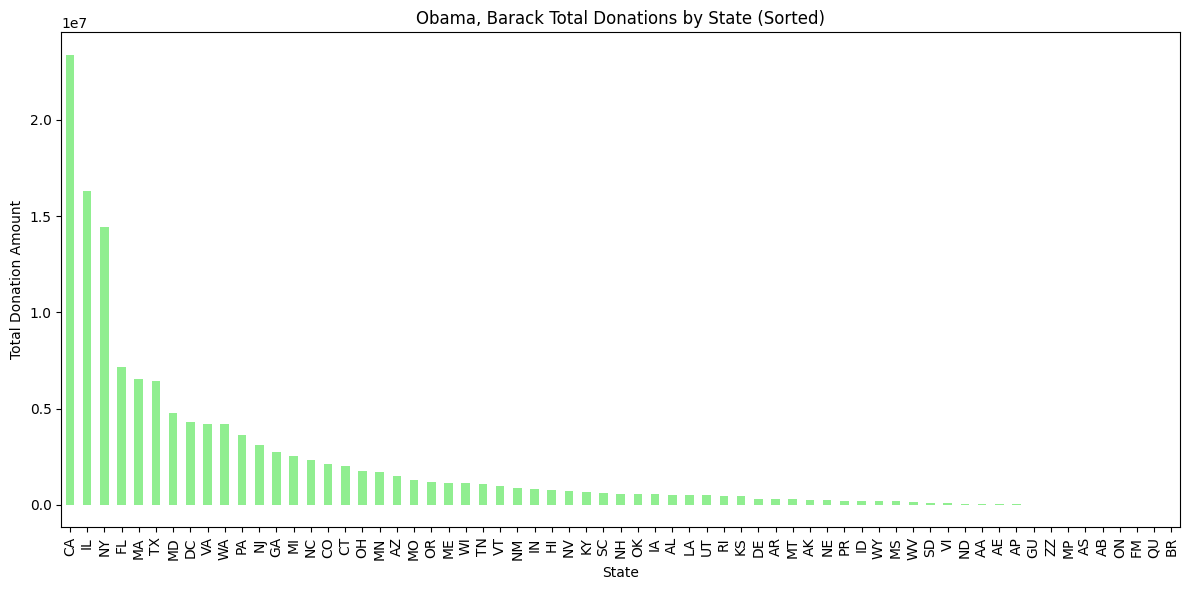

In [7]:
# donation by state Obama, Barack
donations_by_state = data[data['cand_nm']=='Obama, Barack'].groupby('contbr_st')['contb_receipt_amt'].sum()

# pie chart
donations_by_state_sorted = donations_by_state.sort_values(ascending=False)
plt.figure(figsize=(12,6))
donations_by_state_sorted.plot(kind='bar', color='lightgreen')
plt.title('Obama, Barack Total Donations by State (Sorted)')
plt.ylabel('Total Donation Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


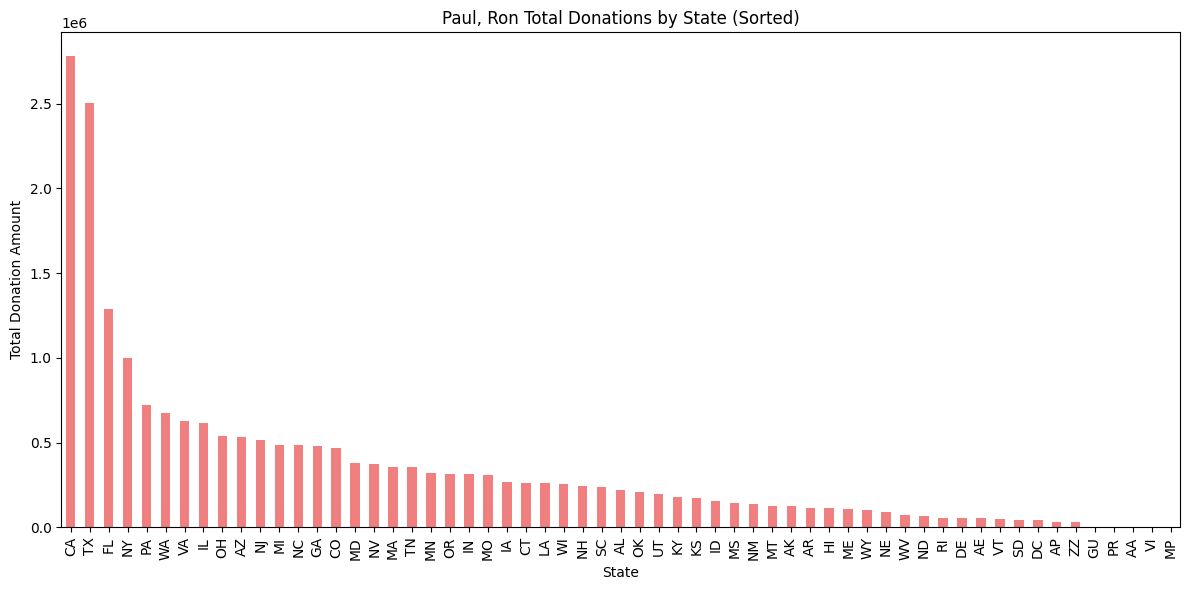

In [8]:
# donation by state Paul, Ron
donations_by_state = data[data['cand_nm']=='Paul, Ron'].groupby('contbr_st')['contb_receipt_amt'].sum()

# bar chart
donations_by_state_sorted = donations_by_state.sort_values(ascending=False)
plt.figure(figsize=(12,6))
donations_by_state_sorted.plot(kind='bar', color='lightcoral')
plt.title('Paul, Ron Total Donations by State (Sorted)')
plt.ylabel('Total Donation Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


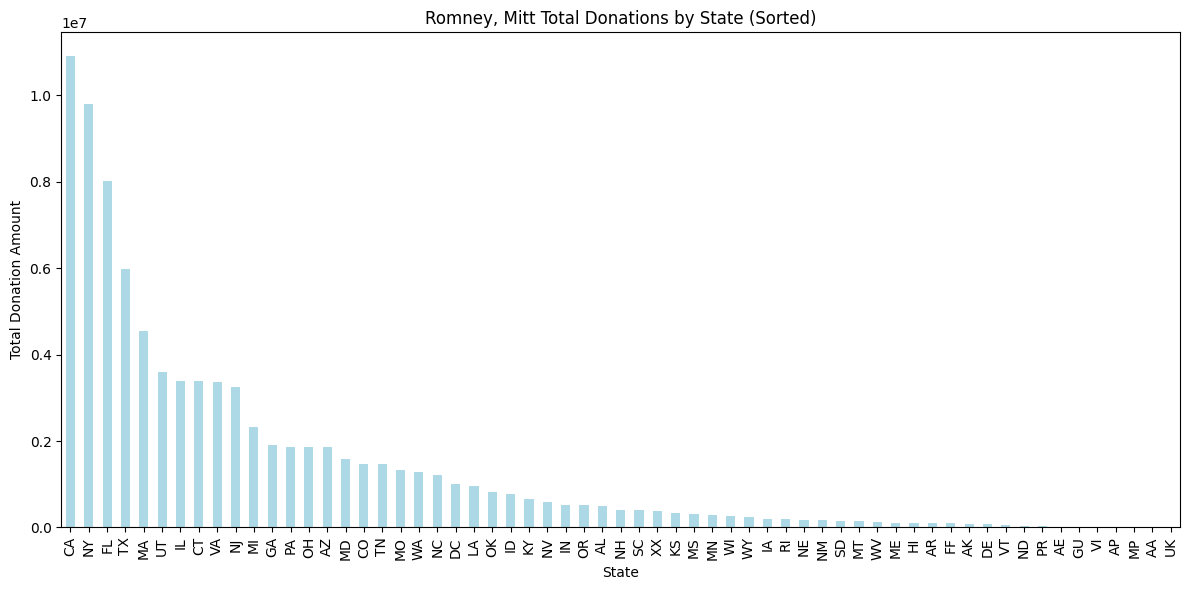

In [9]:
# donation by state Romney, Mitt
donations_by_state = data[data['cand_nm']=='Romney, Mitt'].groupby('contbr_st')['contb_receipt_amt'].sum()

# bar chart descending order
donations_by_state_sorted = donations_by_state.sort_values(ascending=False)
plt.figure(figsize=(12,6))
donations_by_state_sorted.plot(kind='bar', color='lightblue')
plt.title('Romney, Mitt Total Donations by State (Sorted)')
plt.ylabel('Total Donation Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


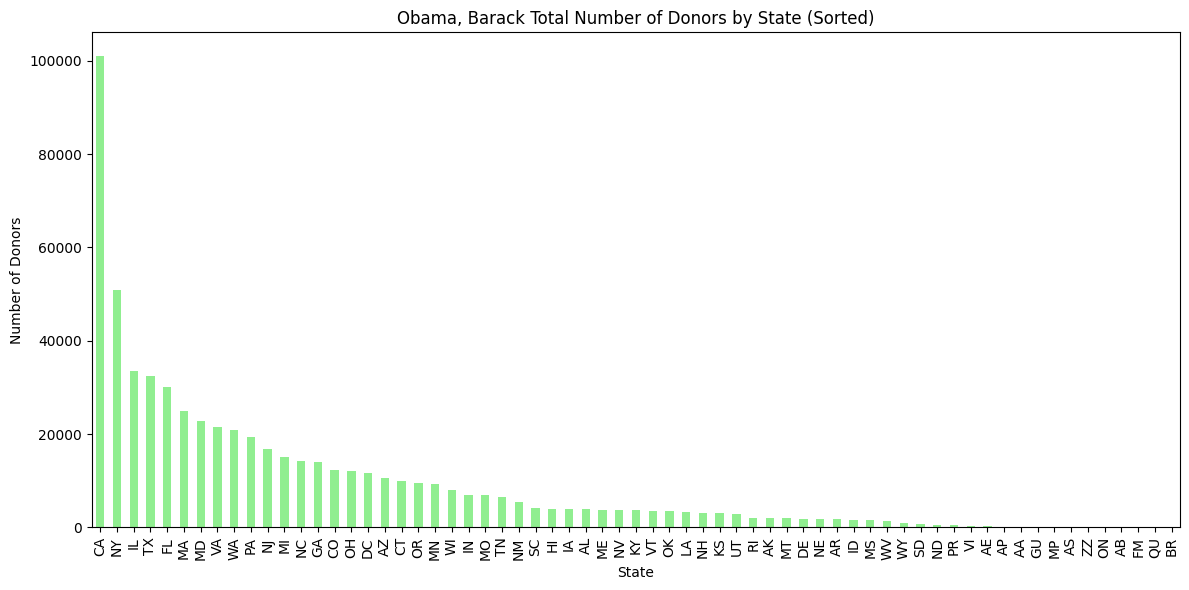

In [10]:
# donors by state Obama, Barack
votes_by_state = data[data['cand_nm']=='Obama, Barack'].groupby('contbr_st')['contb_receipt_amt'].count()

# descending order
votes_by_state_sorted = votes_by_state.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12,6))
votes_by_state_sorted.plot(kind='bar', color='lightgreen')
plt.title('Obama, Barack Total Number of Donors by State (Sorted)')
plt.ylabel('Number of Donors')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()

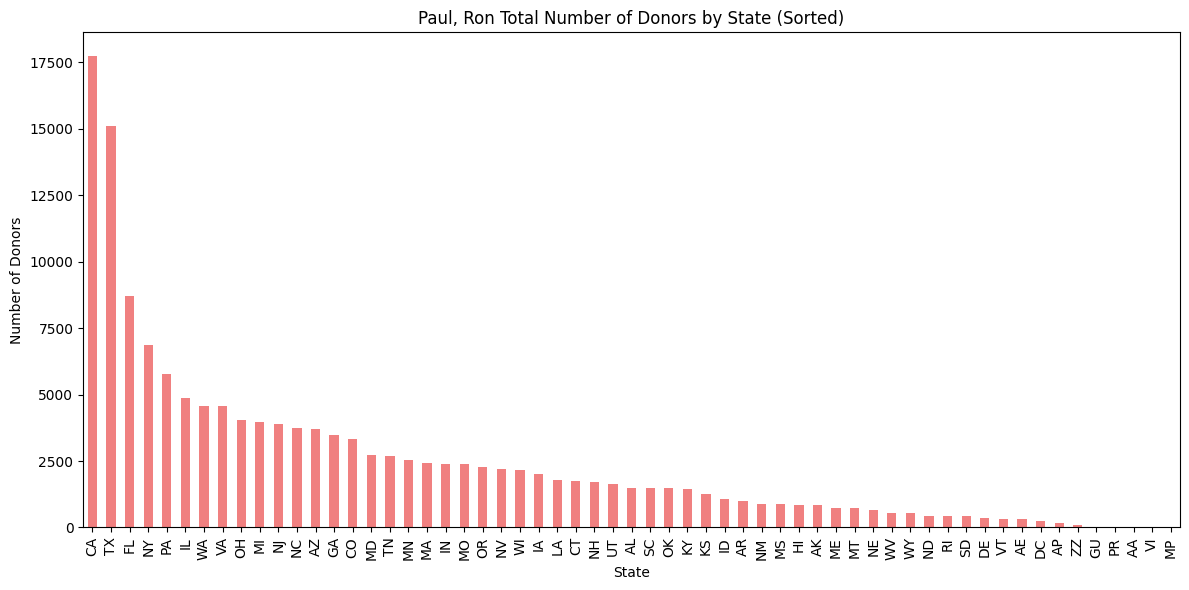

In [11]:
# donors by state Paul, Ron
votes_by_state = data[data['cand_nm']=='Paul, Ron'].groupby('contbr_st')['contb_receipt_amt'].count()

# descending order
votes_by_state_sorted = votes_by_state.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12,6))
votes_by_state_sorted.plot(kind='bar', color='lightcoral')
plt.title('Paul, Ron Total Number of Donors by State (Sorted)')
plt.ylabel('Number of Donors')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()

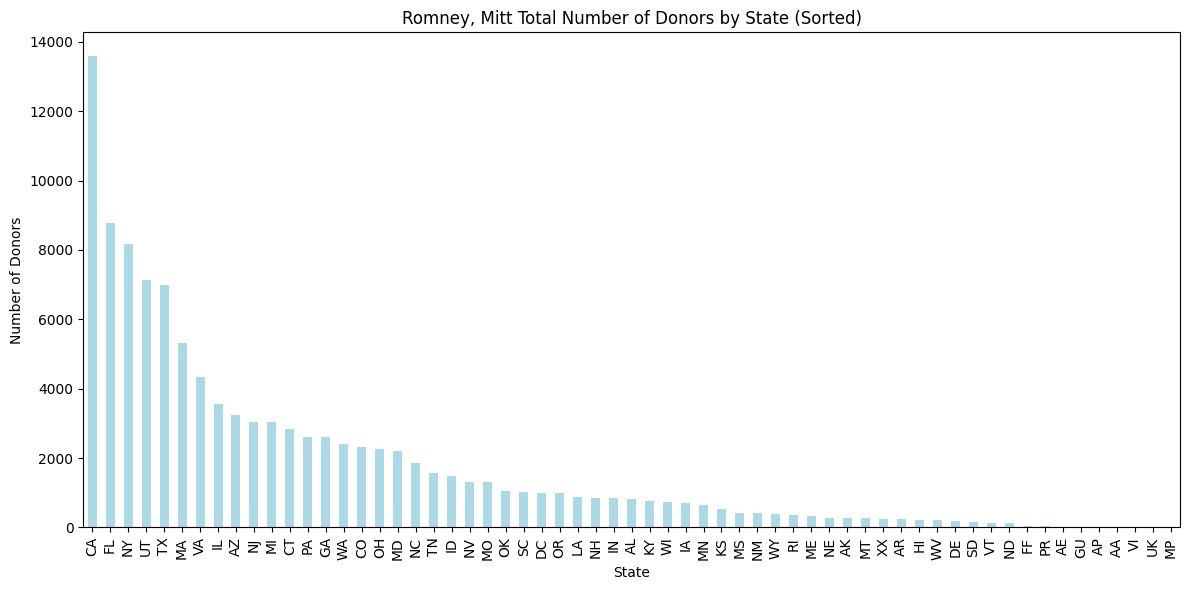

In [12]:
# donors by state Romney, Mitt
votes_by_state = data[data['cand_nm']=='Romney, Mitt'].groupby('contbr_st')['contb_receipt_amt'].count()

# descending order
votes_by_state_sorted = votes_by_state.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12,6))
votes_by_state_sorted.plot(kind='bar', color='lightblue')
plt.title('Romney, Mitt Total Number of Donors by State (Sorted)')
plt.ylabel('Number of Donors')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()

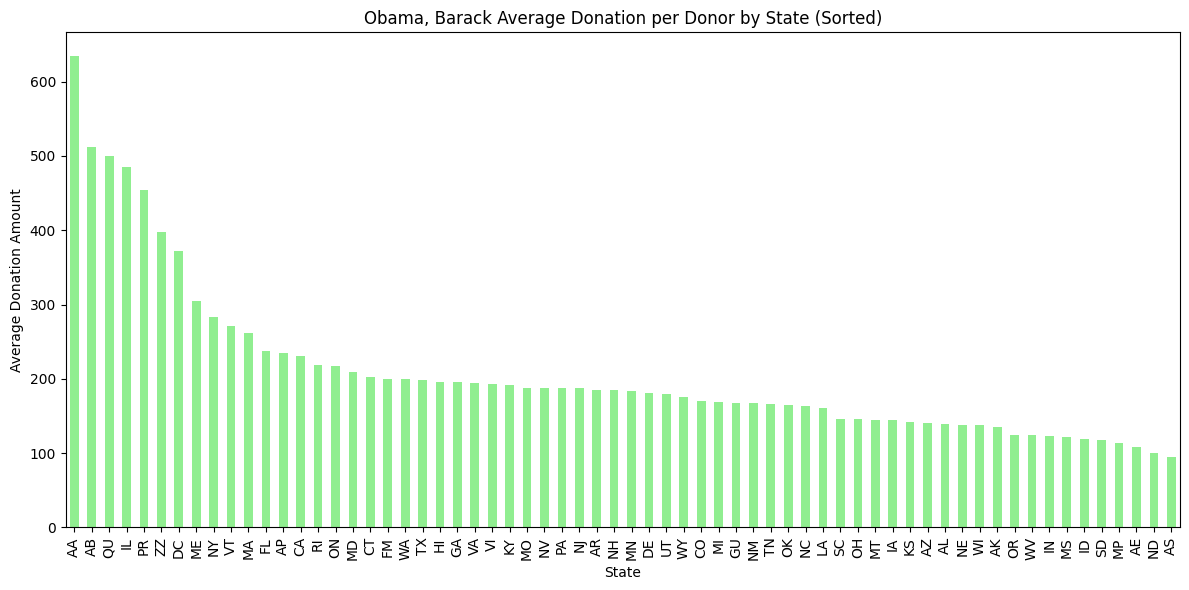

In [13]:
# donors and donation by state Obama, Barack
total_donations_by_state = data[data['cand_nm']=='Obama, Barack'].groupby('contbr_st')['contb_receipt_amt'].sum()
donation_count_by_state = data[data['cand_nm']=='Obama, Barack'].groupby('contbr_st')['contb_receipt_amt'].count()

# average donation per donor by state
average_donation_by_state = total_donations_by_state / donation_count_by_state

# drop 0
average_donation_by_state = average_donation_by_state[average_donation_by_state > 0]

# decending order
average_donation_by_state_sorted = average_donation_by_state.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12,6))
average_donation_by_state_sorted.plot(kind='bar', color='lightgreen')
plt.title('Obama, Barack Average Donation per Donor by State (Sorted)')
plt.ylabel('Average Donation Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# 展示图表
plt.show()


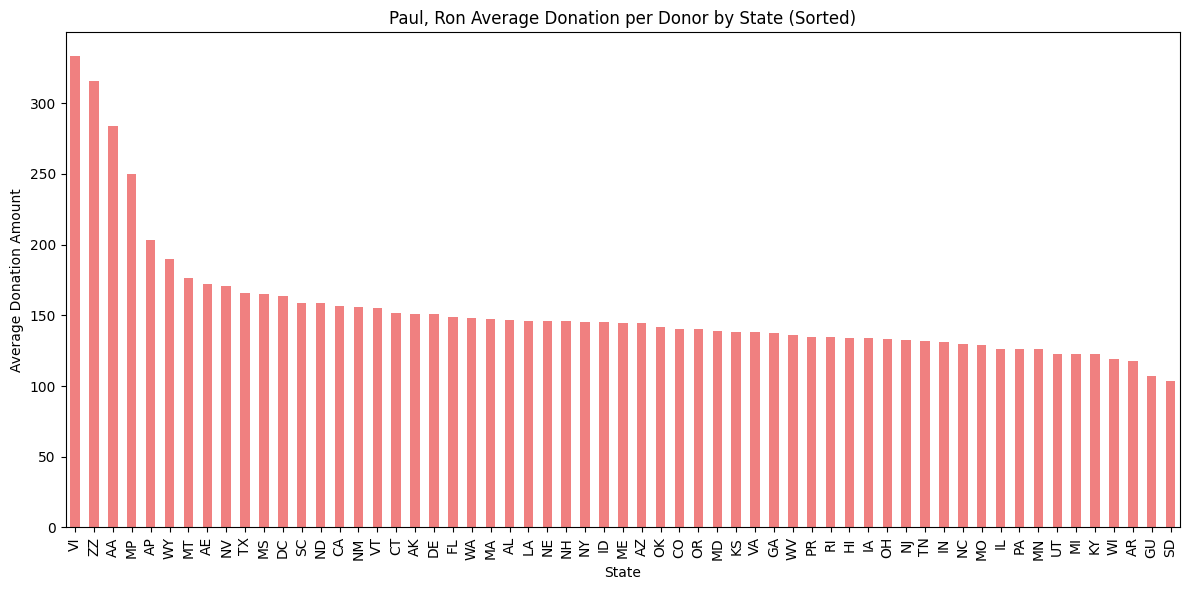

In [14]:
# donors and donation by state
total_donations_by_state = data[data['cand_nm']=='Paul, Ron'].groupby('contbr_st')['contb_receipt_amt'].sum()
donation_count_by_state = data[data['cand_nm']=='Paul, Ron'].groupby('contbr_st')['contb_receipt_amt'].count()

# average donation per donor by state
average_donation_by_state = total_donations_by_state / donation_count_by_state

# drop 0
average_donation_by_state = average_donation_by_state[average_donation_by_state > 0]

# descending order
average_donation_by_state_sorted = average_donation_by_state.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12,6))
average_donation_by_state_sorted.plot(kind='bar', color='lightcoral')
plt.title('Paul, Ron Average Donation per Donor by State (Sorted)')
plt.ylabel('Average Donation Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


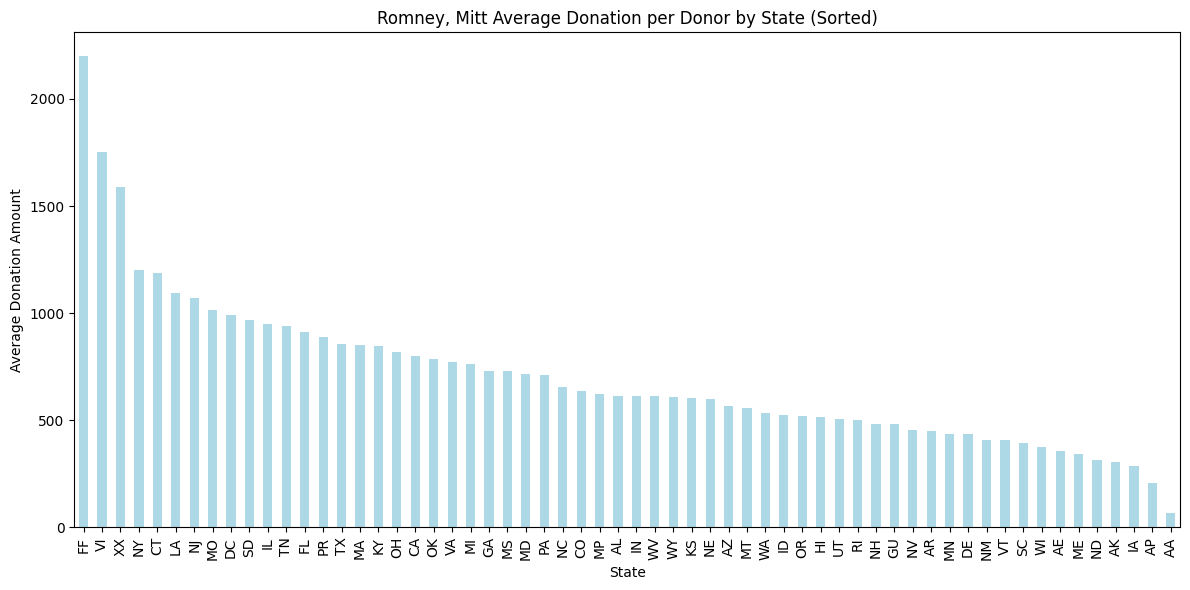

In [15]:
# donors and donation by state
total_donations_by_state = data[data['cand_nm']=='Romney, Mitt'].groupby('contbr_st')['contb_receipt_amt'].sum()
donation_count_by_state = data[data['cand_nm']=='Romney, Mitt'].groupby('contbr_st')['contb_receipt_amt'].count()

# average donation per donor by state
average_donation_by_state = total_donations_by_state / donation_count_by_state

# drop 0
average_donation_by_state = average_donation_by_state[average_donation_by_state > 0]

# descending order
average_donation_by_state_sorted = average_donation_by_state.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12,6))
average_donation_by_state_sorted.plot(kind='bar', color='lightblue')
plt.title('Romney, Mitt Average Donation per Donor by State (Sorted)')
plt.ylabel('Average Donation Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


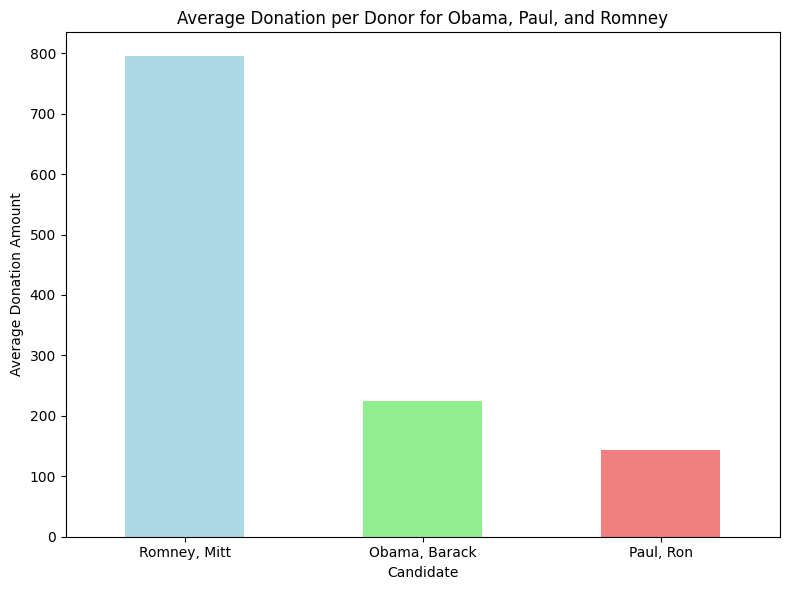

In [16]:
# donors and donation by state 'Obama, Barack', 'Paul, Ron', 和 'Romney, Mitt'
selected_candidates = ['Obama, Barack', 'Paul, Ron', 'Romney, Mitt']

# donation
total_donations_by_candidate = data[data['cand_nm'].isin(selected_candidates)].groupby('cand_nm')['contb_receipt_amt'].sum()

# donors
donation_count_by_candidate = data[data['cand_nm'].isin(selected_candidates)].groupby('cand_nm')['contb_receipt_amt'].count()

# average donation per donor
average_donation_by_candidate = total_donations_by_candidate / donation_count_by_candidate

# drop 0
average_donation_by_candidate = average_donation_by_candidate[average_donation_by_candidate > 0]

# descending order 
average_donation_by_candidate_sorted = average_donation_by_candidate.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(8,6))
average_donation_by_candidate_sorted.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Average Donation per Donor for Obama, Paul, and Romney')
plt.ylabel('Average Donation Amount')
plt.xlabel('Candidate')
plt.xticks(rotation=0)
plt.tight_layout()

# show
plt.show()


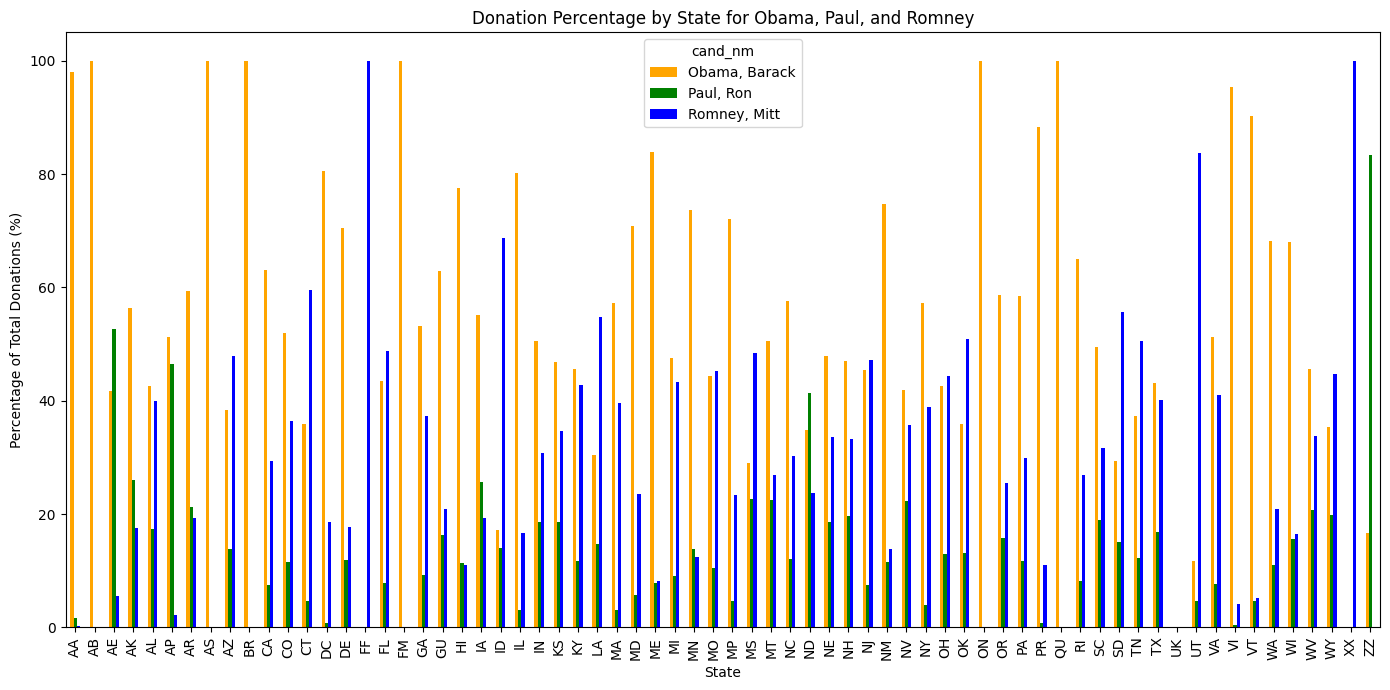

In [17]:
#  'Obama, Barack', 'Paul, Ron', 和 'Romney, Mitt' 
selected_candidates = ['Obama, Barack', 'Paul, Ron', 'Romney, Mitt']
filtered_data = data[data['cand_nm'].isin(selected_candidates)]

# donation
donations_by_candidate_state = filtered_data.groupby(['contbr_st', 'cand_nm'])['contb_receipt_amt'].sum().unstack()

# drop na
donations_by_candidate_state = donations_by_candidate_state.dropna(how='all')

# donation by state
total_donations_by_state = donations_by_candidate_state.sum(axis=1)

# percentage by state
donation_percentage_by_candidate_state = donations_by_candidate_state.div(total_donations_by_state, axis=0) * 100

# bar
donation_percentage_by_candidate_state.plot(kind='bar', figsize=(14,7), color=['orange', 'green', 'blue'])
plt.title('Donation Percentage by State for Obama, Paul, and Romney')
plt.ylabel('Percentage of Total Donations (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


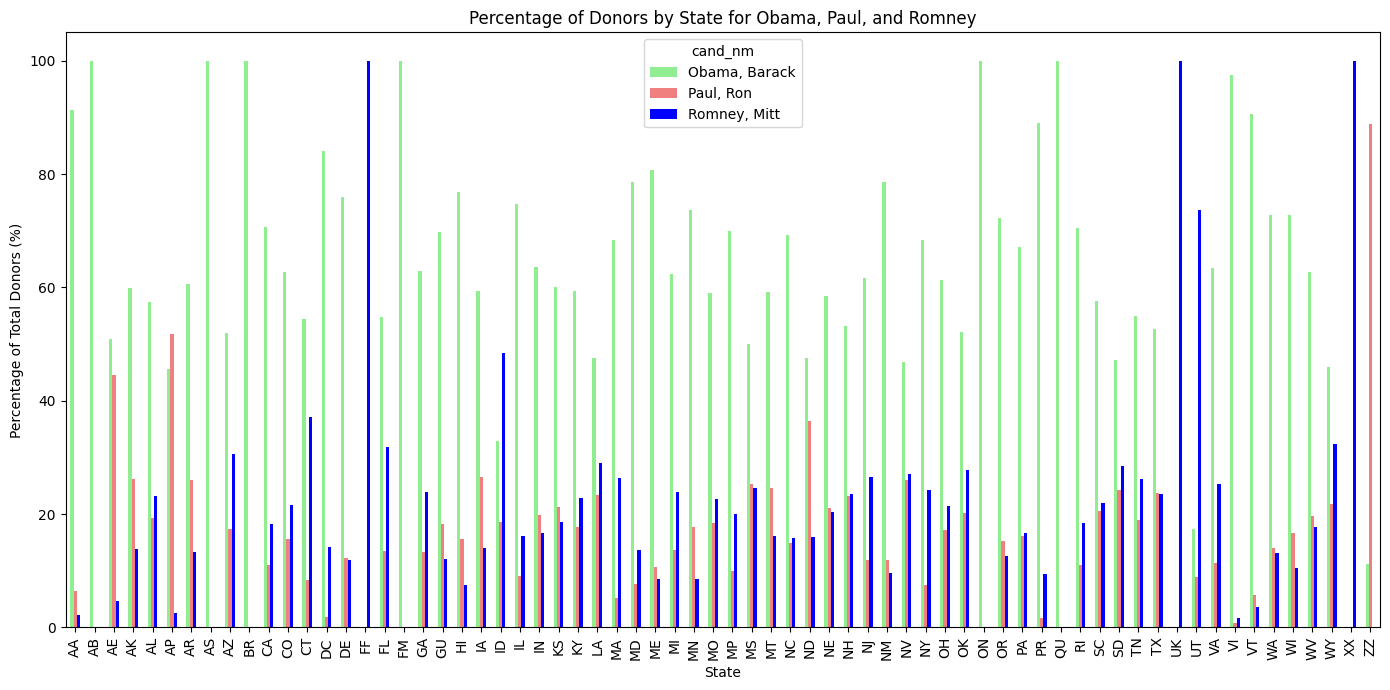

In [18]:
# doners by state candidate
donors_by_candidate_state = filtered_data.groupby(['contbr_st', 'cand_nm'])['contbr_nm'].nunique().unstack()

# fill na with 0
donors_by_candidate_state = donors_by_candidate_state.fillna(0)

# doners by state
total_donors_by_state = donors_by_candidate_state.sum(axis=1)

# percentage by state candidate
donor_percentage_by_candidate_state = donors_by_candidate_state.div(total_donors_by_state, axis=0) * 100

# bar
donor_percentage_by_candidate_state.plot(kind='bar', figsize=(14,7), color=['lightgreen', 'lightcoral', 'blue'])
plt.title('Percentage of Donors by State for Obama, Paul, and Romney')
plt.ylabel('Percentage of Total Donors (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

# show
plt.show()


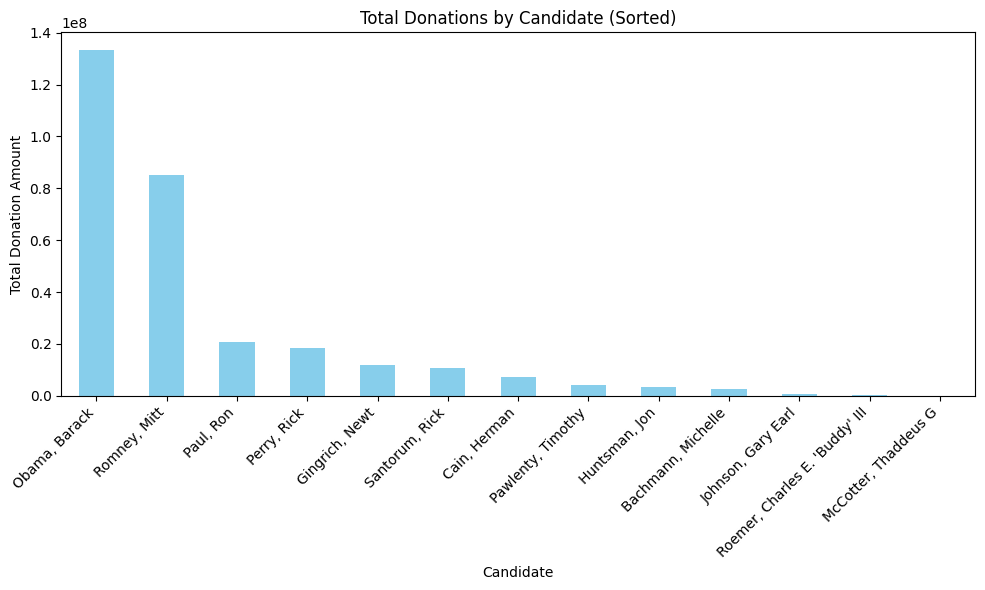

In [19]:
# doners by candidate descending order
donations_by_candidate = data.groupby('cand_nm')['contb_receipt_amt'].sum()
donations_by_candidate_sorted = donations_by_candidate.sort_values(ascending=False)

# bar
plt.figure(figsize=(10,6))
donations_by_candidate_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Donations by Candidate (Sorted)')
plt.ylabel('Total Donation Amount')
plt.xlabel('Candidate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# show
plt.show()

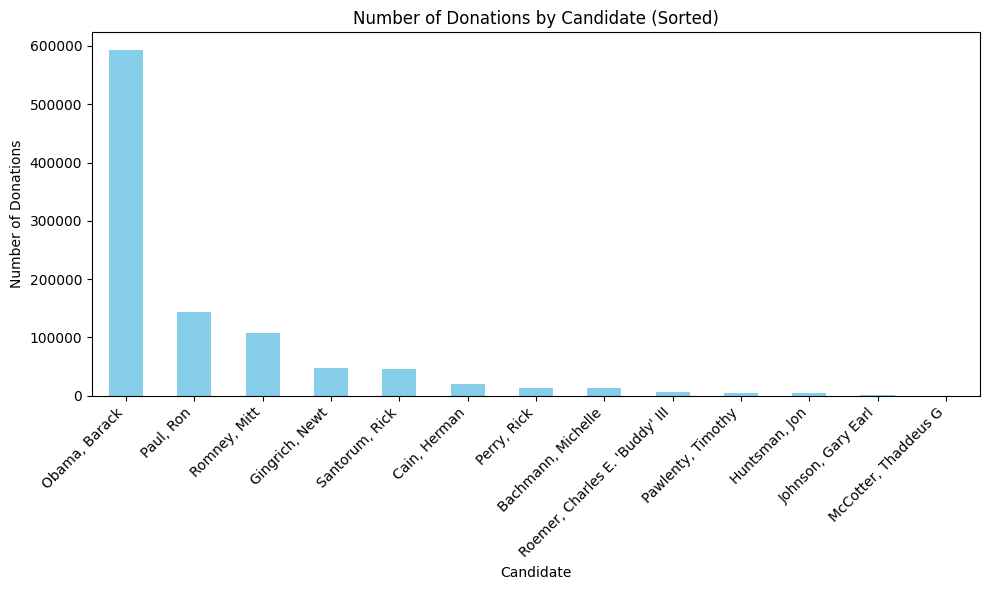

In [20]:
# donations by candidate descending order
donations_count_by_candidate = data.groupby('cand_nm')['contb_receipt_amt'].count()
donations_count_by_candidate_sorted = donations_count_by_candidate.sort_values(ascending=False)

# bar chart
plt.figure(figsize=(10,6))
donations_count_by_candidate_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Donations by Candidate (Sorted)')
plt.ylabel('Number of Donations')
plt.xlabel('Candidate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# show
plt.show()